## **MULTICLASS LOGISTIC REGRESSION IMPLEMENTATION** - One Vs All

In [1]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from tqdm.notebook import trange, tqdm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

11501568/11490434 [==============================] - 0s 0us/step
[7, 3, 5, 4, 2, 1, 0, 1, 3]


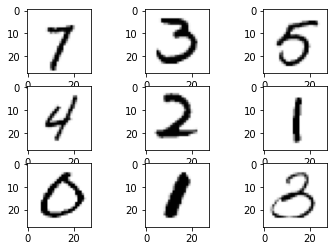

In [2]:
#loading the MNIST digits data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

labels = []
# plot 9 a random image with matplotlib and its labels 
for i in range(1, 10):
    index = np.random.choice(59999)
    labels.append(train_y[index])
    plt.subplot(330 + i)
    plt.imshow(train_X[index], cmap='Greys')
print(labels)
plt.show()

In [3]:
# the number of samples and shapes of the matrices 
m_train = len(train_X)
m_test = len(test_y)
num_px = np.shape(train_X[0])[0]

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
# Reshape the training and test examples
trainImagesFlatten = train_X.reshape(m_train, -1)
trainLabelsFlatten = train_y.reshape(train_y.shape[0],1)
testImagesFlatten = test_X.reshape(m_test, -1)
testLabelsFlatten = test_y.reshape(test_y.shape[0],1)

print ("trainImagesFlatten shape: ", trainImagesFlatten.shape)
print ("trainLabelsFlatten shape: ", trainLabelsFlatten.shape)
print ("testImagesFlatten shape: ", testImagesFlatten.shape)
print ("testLabelsFlatten shape: ", testLabelsFlatten.shape)

# Standardize the dataset 
trainImages = trainImagesFlatten / 255
testImages = testImagesFlatten / 255
trainLabels = trainLabelsFlatten
testLabels = testLabelsFlatten

trainImagesFlatten shape:  (60000, 784)
trainLabelsFlatten shape:  (60000, 1)
testImagesFlatten shape:  (10000, 784)
testLabelsFlatten shape:  (10000, 1)


In [5]:
# creating train and test dataframes
X=pd.DataFrame(trainImages)
Y=pd.DataFrame(trainLabels)
df = pd.concat([pd.Series(1, index=X.index, name='00'), X], axis=1)

X_test=pd.DataFrame(testImages)
Y_test=pd.DataFrame(testLabels)
df_test = pd.concat([pd.Series(1, index=X_test.index, name='00'), X_test], axis=1)

# one hot encoding for train & test labels
y = Y.iloc[:, 0]
Y_test=Y_test.iloc[:,0]
print('Classes:',y.unique())
mlb = LabelBinarizer()
y1  = pd.DataFrame(mlb.fit_transform(y))
y2  = pd.DataFrame(mlb.fit_transform(Y_test))
print('One hot encoding of train classes :\n',y1.head())

Classes: [5 0 4 1 9 2 3 6 7 8]
One hot encoding of train classes :
    0  1  2  3  4  5  6  7  8  9
0  0  0  0  0  0  1  0  0  0  0
1  1  0  0  0  0  0  0  0  0  0
2  0  0  0  0  1  0  0  0  0  0
3  0  1  0  0  0  0  0  0  0  0
4  0  0  0  0  0  0  0  0  0  1


In [6]:
# sigmoid and cost function
def sigmoid(theta, F):
    return 1 / (1 + np.exp(-(np.dot(theta, F.T))))

def cost(G, y, theta):
    y1 = sigmoid(G, theta)
    return -(1/len(G)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

In [7]:
# function for gradient descent
lr = 0.5     #learning rate
epochs = 200    # no.of.epochs
def train(X, y, theta, alpha, epochs):
    m = len(X)
    for i in trange(epochs): 
        for j in range(10):
            theta = pd.DataFrame(theta)
            h = sigmoid(theta.iloc[:,j], X)
            for k in range(0, theta.shape[0]):
                theta.iloc[k, j] -= (alpha/m) * np.sum((h-y.iloc[:, j])*X.iloc[:, k])
            theta = pd.DataFrame(theta)
    return theta, cost

In [8]:
def ClassificationReport(theta,xt,yt,ylt,isconfusion=False):
  output = []
  for i in range(0, 10):
      theta1 = pd.DataFrame(theta)
      h = sigmoid(theta1.iloc[:,i], xt)
      output.append(h)
  output=pd.DataFrame(output)

  acc = 0
  for col in range(0, 10):
      for row in range(len(yt)):
          if yt.iloc[row, col] == 1 and output.iloc[col, row] >= 0.5:
              acc += 1
  accuracy = acc/len(xt)
  print('Overall Accuracy:',accuracy)
  
  y1_pred = np.argmax(np.array(output),axis=0)
  clf = classification_report(ylt, y1_pred,output_dict=True)
  if isconfusion:
    print('Confusion Matrix')
    cm=confusion_matrix(ylt,y1_pred)
    fig_dims = (12, 8)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.heatmap(cm,annot=True,fmt='.6g',cmap='YlGnBu',ax=ax)
    plt.show()
  return accuracy,clf

In [9]:
# function for logistic regression before applying feature reduction
def beforeFR(theta):
  theta = np.zeros([X.shape[1]+1,y1.shape[1]]) #theta matrix =>weights
  theta,cost = train(df, y1, theta, lr, epochs)
  print('Train Data Report:')
  ac_train,clf_train=ClassificationReport(theta,df,y1,trainLabels,True)

  print('Test Data Report:')
  ac_test,clf_test=ClassificationReport(theta,df_test,y2,testLabels,True)
  return clf_train,clf_test

# **SVD IMPLEMENTATION**

# **QUESTION 1 :** For the MNIST dataset, apply the feature reduction using singular value decomposition(SVD).

SVD was applied on MNIST dataset image by image and the optimal number of features was found.From the plot it can be observed that by selecting the maximal optimal features,all the images can be reconstructed.

[2, 18, 604, 352, 1237, 432, 1147, 538, 2557, 1342, 5518, 2838, 8629, 3895, 9872, 4172, 8027, 3389, 5431]


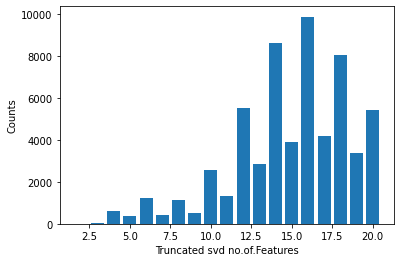

In [12]:
r=[]
for i in range(train_X.shape[0]):
  U, s, V = np.linalg.svd(train_X[i])
  S = np.zeros((train_X[i].shape[0], train_X[i].shape[1]))
  S[:train_X[i].shape[0], :train_X[i].shape[0]] = np.diag(s)
  rank = np.linalg.matrix_rank(S)
  r.append(rank)

r1=list(set(r))
c=[r.count(i) for i in r1]
print(c)
plt.bar(r1,c)
plt.xlabel('Truncated svd no.of.Features')
plt.ylabel('Counts')
plt.show()

In [ ]:
def SVD(r):
  rec_image=[]

  for i in range(train_X.shape[0]):
    U, s, V = np.linalg.svd(train_X[i])
    S = np.zeros((train_X[i].shape[0], train_X[i].shape[1]))
    S[:train_X[i].shape[0], :train_X[i].shape[0]] = np.diag(s)
    n_component = r
    S = S[:, :n_component]
    VT = V[:n_component, :]
    A = U.dot(S.dot(VT))
    rec_image.append(A)

  red_train=np.rollaxis(np.dstack(rec_image),axis=-1)
  red_train=red_train.reshape(m_train, -1)
  trainImages = red_train / 255
  return trainImages

In [ ]:
#logistic regression implementation after feature reduction
def AfterFR(r,theta,c=False):
  trainImg=SVD(r)
  theta = np.zeros([X.shape[1]+1,y1.shape[1]])
  X_FR=pd.DataFrame(trainImg)
  df_FR_train = pd.concat([pd.Series(1, index=X_FR.index, name='00'), X_FR], axis=1)
  theta,cost = train(df_FR_train , y1, theta, lr, epochs)
  print('Train Data Report using feature reduction:')
  ac_train,clf_train=ClassificationReport(theta,df_FR_train ,y1,trainLabels,c)

  print('Test Data using feature reduction:')
  ac_test,clf_test=ClassificationReport(theta,df_test,y2,testLabels,c)
  return ac_train,ac_test,clf_train,clf_test

In [ ]:
# to compare model accuracy trained on different number of features
def compareFR():
  train_acc = []
  test_acc = []
  features = [1,2,5,10,16,20,28]
  for i in features:
    print('For {} features'.format(i))
    ac_train,ac_test,clf_train,clf_test=AfterFR(i)
    train_acc.append(ac_train)
    test_acc.append(ac_test)
    print('********************************************************************')
  plt.plot(features,train_acc)
  plt.title('No.of.features vs Accuracy')
  plt.xlabel('No.of.features')
  plt.ylabel('Accuracy')
  plt.show()

# **QUESTION 2:** Classify the dataset using logistic regression before applying the feature reduction.


Train Data Report:
Overall Accuracy: 0.8138333333333333
Confusion Matrix


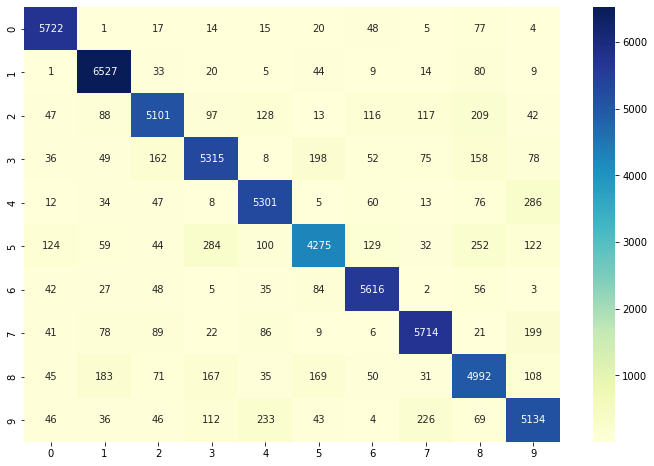

Test Data Report:
Overall Accuracy: 0.8232
Confusion Matrix


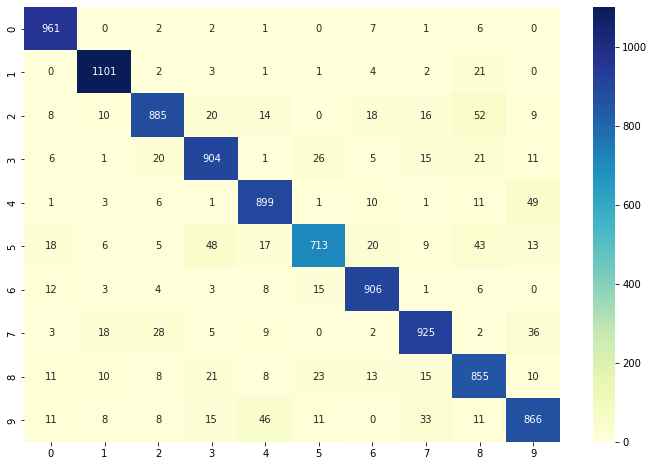

In [ ]:
clf_trainBFR,clf_testBFR=beforeFR()

# **QUESTION 3:** Classify the dataset using logistic regression after applying the feature reduction using SVD. 

SVD was applied on MNIST dataset and it was truncated at 400 features.
Then the logistic regression model was trained with reduced feature dataset. From the evaluation metrics it was observed that the model trained with optimal features produced same result as the model trained with all features.

Train Data Report using feature reduction:
Overall Accuracy: 0.8138333333333333
Confusion Matrix


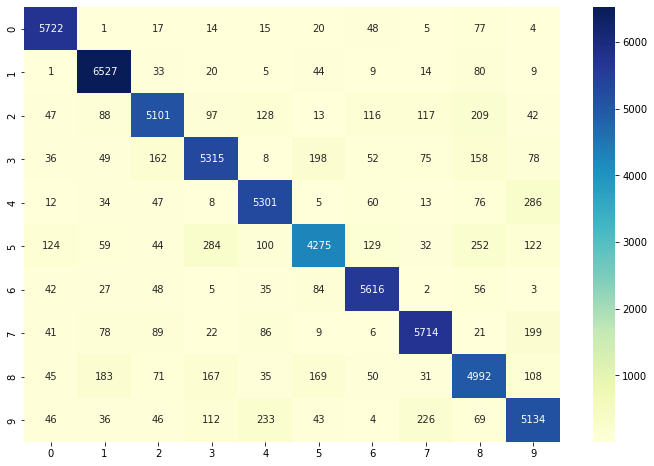

Test Data using feature reduction:
Overall Accuracy: 0.8232
Confusion Matrix


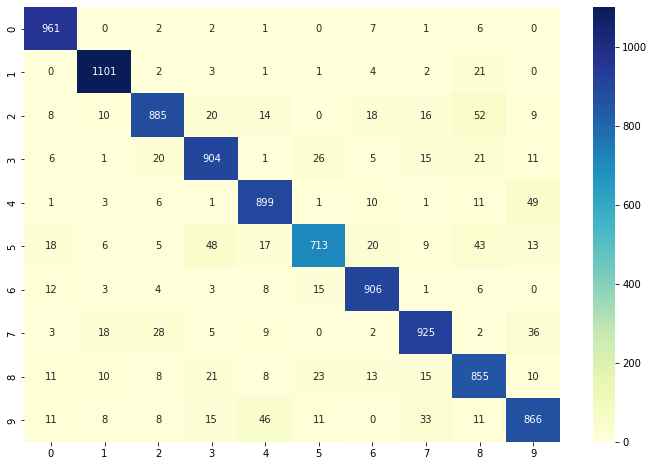

In [ ]:
acc_train,acc_test,clf_trainAFR,clf_testAFR=AfterFR(20,True)

# **QUESTION 4:** Find the optimal feature dimension based on the accuracy. 

To find the optimal feature dimension, SVD was applied on the MNIST DATASET and then the logistic regression model was trained with the reduced number of features.
To find optimal feature dimension based on accuracy,accuracy was found for different truncated svd (for 4,25,100,256,400,784 features) .

It can be seen that by using 400 features outoff 784 features ,we can acquire the accuracy achieved by all 784 features.

TRAINING ACCURACY USING ALL FEATURES (i.e.784) =81.383

TRAINING ACCURACY USING ONLY 400 FEATURES =81.383

**Therefore n_components=20(20x20 =400),would be the optimal feature dimension to achieve maximum accuracy.**

For 1 features
Train Data Report using feature reduction:
Overall Accuracy: 0.5957166666666667
Test Data using feature reduction:
Overall Accuracy: 0.611
********************************************************************
For 2 features
Train Data Report using feature reduction:
Overall Accuracy: 0.7553666666666666
Test Data using feature reduction:
Overall Accuracy: 0.8425
********************************************************************
For 5 features
Train Data Report using feature reduction:
Overall Accuracy: 0.8108333333333333
Test Data using feature reduction:
Overall Accuracy: 0.8222
********************************************************************
For 10 features
Train Data Report using feature reduction:
Overall Accuracy: 0.81395
Test Data using feature reduction:
Overall Accuracy: 0.8231
********************************************************************
For 16 features
Train Data Report using feature reduction:
Overall Accuracy: 0.8138166666666666
Test Data using fea

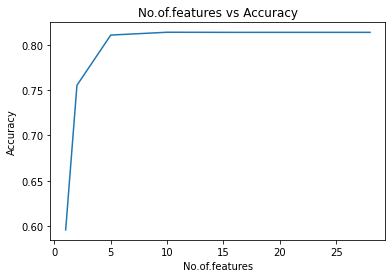

In [ ]:
compareFR()

# **QUESTION 5:** For the optimal feature dimension, evaluate the model before and after applying the feature dimension based on Precision, Recall and F1-Score for each class.

From the below classification report ,it depicts that precision,recall and f1-score for each class is same for the model trained with all features(i.e. without applying feature reduction)  and the model trained with optimal feature dimension.

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print('Train - Classification Report before feature reduction:\n',pd.DataFrame(clf_trainBFR).transpose())
print('\n************************************************************************\n')
print('Test - Classification Report before feature reduction:\n',pd.DataFrame(clf_testBFR).transpose())

Train - Classification Report before feature reduction:
               precision    recall  f1-score      support
0              0.935579  0.966064  0.950577   5923.00000
1              0.921632  0.968110  0.944300   6742.00000
2              0.901555  0.856160  0.878271   5958.00000
3              0.879385  0.866906  0.873101   6131.00000
4              0.891524  0.907395  0.899389   5842.00000
5              0.879630  0.788600  0.831631   5421.00000
6              0.922167  0.948969  0.935376   5918.00000
7              0.917322  0.912051  0.914679   6265.00000
8              0.833389  0.853187  0.843172   5851.00000
9              0.857811  0.863002  0.860399   5949.00000
accuracy       0.894950  0.894950  0.894950      0.89495
macro avg      0.893999  0.893045  0.893090  60000.00000
weighted avg   0.894642  0.894950  0.894382  60000.00000

************************************************************************

Test - Classification Report before feature reduction:
               

In [ ]:
display('Train - Classification Report after feature reduction (truncated at r=20):',pd.DataFrame(clf_trainAFR).transpose())
print('\n************************************************************************\n')
display('Test - Classification Report after feature reduction (truncated at r=20):',pd.DataFrame(clf_testAFR).transpose())

'Train - Classification Report after feature reduction (truncated at r=20):'

,precision,recall,f1-score,support
0,0.935579,0.966064,0.950577,5923.00000
1,0.921632,0.968110,0.944300,6742.00000
2,0.901555,0.856160,0.878271,5958.00000
3,0.879385,0.866906,0.873101,6131.00000
4,0.891524,0.907395,0.899389,5842.00000
5,0.879630,0.788600,0.831631,5421.00000
6,0.922167,0.948969,0.935376,5918.00000
7,0.917322,0.912051,0.914679,6265.00000
8,0.833389,0.853187,0.843172,5851.00000
9,0.857811,0.863002,0.860399,5949.00000



************************************************************************



'Test - Classification Report after feature reduction (truncated at r=20):'

,precision,recall,f1-score,support
0,0.932105,0.980612,0.955743,980.0000
1,0.949138,0.970044,0.959477,1135.0000
2,0.914256,0.857558,0.885000,1032.0000
3,0.884540,0.895050,0.889764,1010.0000
4,0.895418,0.915479,0.905337,982.0000
5,0.902532,0.799327,0.847800,892.0000
6,0.919797,0.945720,0.932578,958.0000
7,0.908644,0.899805,0.904203,1028.0000
8,0.831712,0.877823,0.854146,974.0000
9,0.871227,0.858276,0.864703,1009.0000
